Nous allons travailler sur des données des annonces de vente et location de biens en Tunisie

1. Placer le Dataset dans votre espace Drive
2. Importation de la dataset

In [30]:
import pandas as pd

df = pd.read_csv("/content/Property Prices in Tunisia.csv")

3. Afficher les premières lignes de la dataset

In [31]:
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [ ]:
4. Afficher quelques informations autour de la dataset

In [79]:
df.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


5. Utiliser la méthode plot de la bibliothèque matplotlib pour afficher des bars mesurant le nombre de biens par category
https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


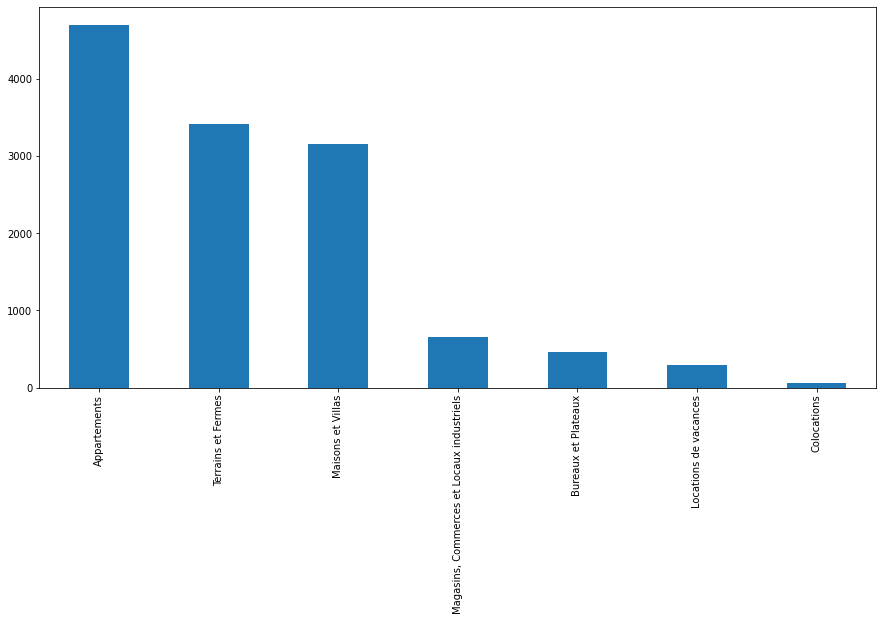

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
#sns.countplot(df['category'])
df.category.value_counts().plot(kind='bar')
 


6. Utiliser la méthode countplot de la bibliothèque seaborn pour afficher le nombre de biens par ville

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'city')

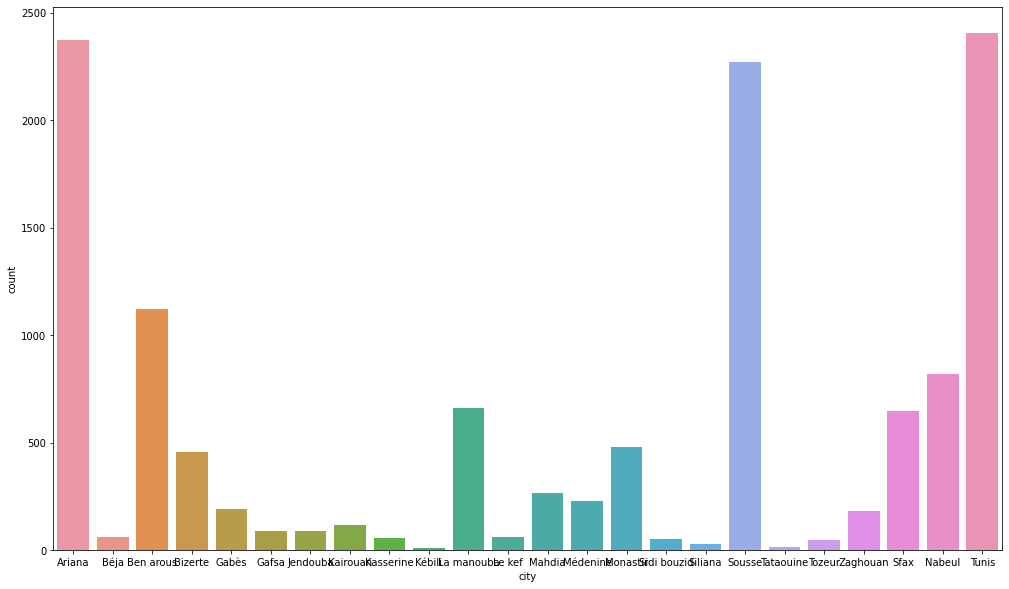

In [83]:
plt.figure(figsize=(17,10))
sns.countplot(df['city'])
plt.xlabel("city")

7. Afficher un histogramme de biens en vente ou en location par ville en utilisant la méthode subplot de la bibliothèque matplotlib

<Figure size 2160x1440 with 0 Axes>

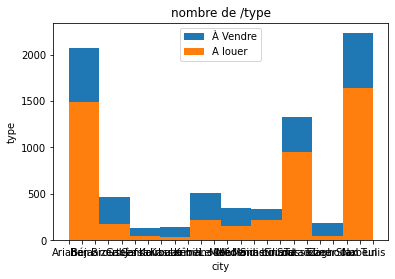

In [46]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
 

ax.hist(df['city'][df.type == 'À Vendre'].dropna(), label='À Vendre')
ax.hist(df['city'][df.type == 'À Louer'].dropna(), label='A louer')
 
plt.xlabel('city')
plt.ylabel('type')
plt.title('nombre de /type')
plt.legend()
plt.show()

8. Afficher le nombre de biens en vente vs le nombre de biens en location moyennant la méthode countplot de la bibliothèque seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Type Count')

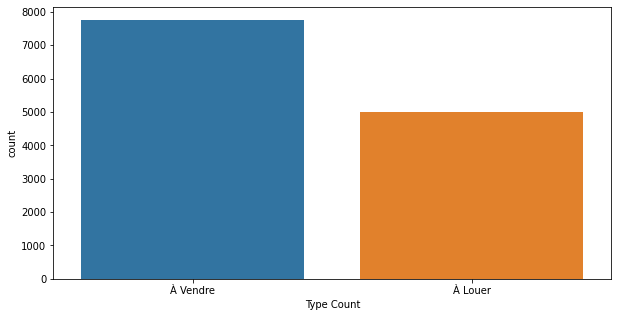

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(df['type'])
plt.xlabel("Type Count")

9. Faites un affichage du nombre de biens par city trié en décroissant

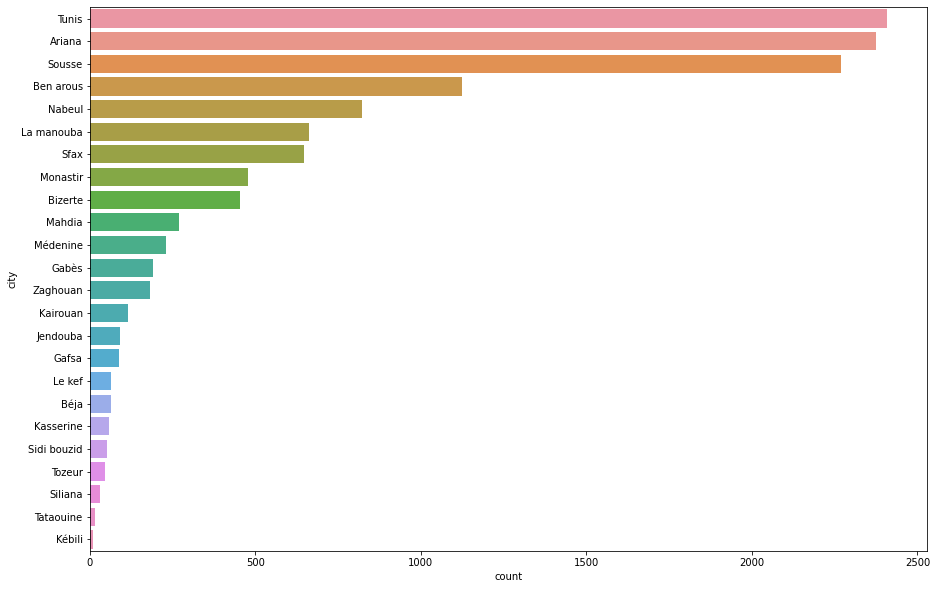

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(y=df['city'],order=df.city.value_counts().index)

10. créer un dataFrame ne contenant que les appartements avec uniquement des info autour du prix et du size

In [54]:
from numpy import size
df_app= df.loc[df['category']=='Appartements']

In [63]:
columns=['size','price']
df_app = df_app[columns]
df_app

,size,price
2,80.0,380.0
4,113.0,170000.0
6,100.0,670.0
13,138.0,340000.0
15,180.0,300.0
...,...,...
12735,70.0,140.0
12738,60.0,90.0
12740,68.0,110000.0
12741,140.0,250000.0


11. faites un affichage en nuage de point de l'évolution des prix des appartements en fonction de leur size

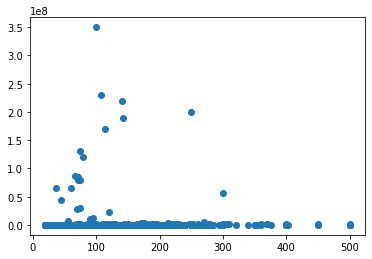

In [65]:
plt.plot(df_app['size'], df_app['price'],'o')
plt.show()

12. qu'est ce que vous remarquez?

13. Redéfinissez la dataframe des appartements en utilisant la colonne log_price au lieu de la colonne price et rajouter la colonne type

In [71]:
columns=['size','log_price','type']
df_app= df.loc[df['category']=='Appartements']
df_app = df_app[columns]
df_app

,size,log_price,type
2,80.0,2.579784,À Louer
4,113.0,5.230449,À Vendre
6,100.0,2.826075,À Louer
13,138.0,5.531479,À Vendre
15,180.0,2.477121,À Louer
...,...,...,...
12735,70.0,2.146128,À Louer
12738,60.0,1.954243,À Louer
12740,68.0,5.041393,À Vendre
12741,140.0,5.397940,À Vendre


14. Refaire l'affichage en nuage de points des prix en fonction des size

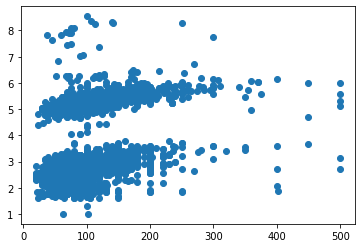

In [72]:
plt.plot(df_app['size'], df_app['log_price'],'o')
plt.show()

15. Utiliser les couleurs pour différencier les appartements en location de ceux en vente

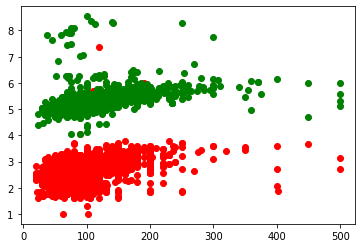

In [77]:
plt.scatter(df_app['size'][df.type=="À Louer"], df_app['log_price'][df.type=="À Louer"],c='red')
plt.scatter(df_app['size'][df.type=="À Vendre"], df_app['log_price'][df.type=="À Vendre"],c='green')

plt.show()